In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score,  classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

## DATA GATHERING

In [7]:
df = pd.read_csv('iris.csv')

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.drop('Id',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## DATA ANALYSIS

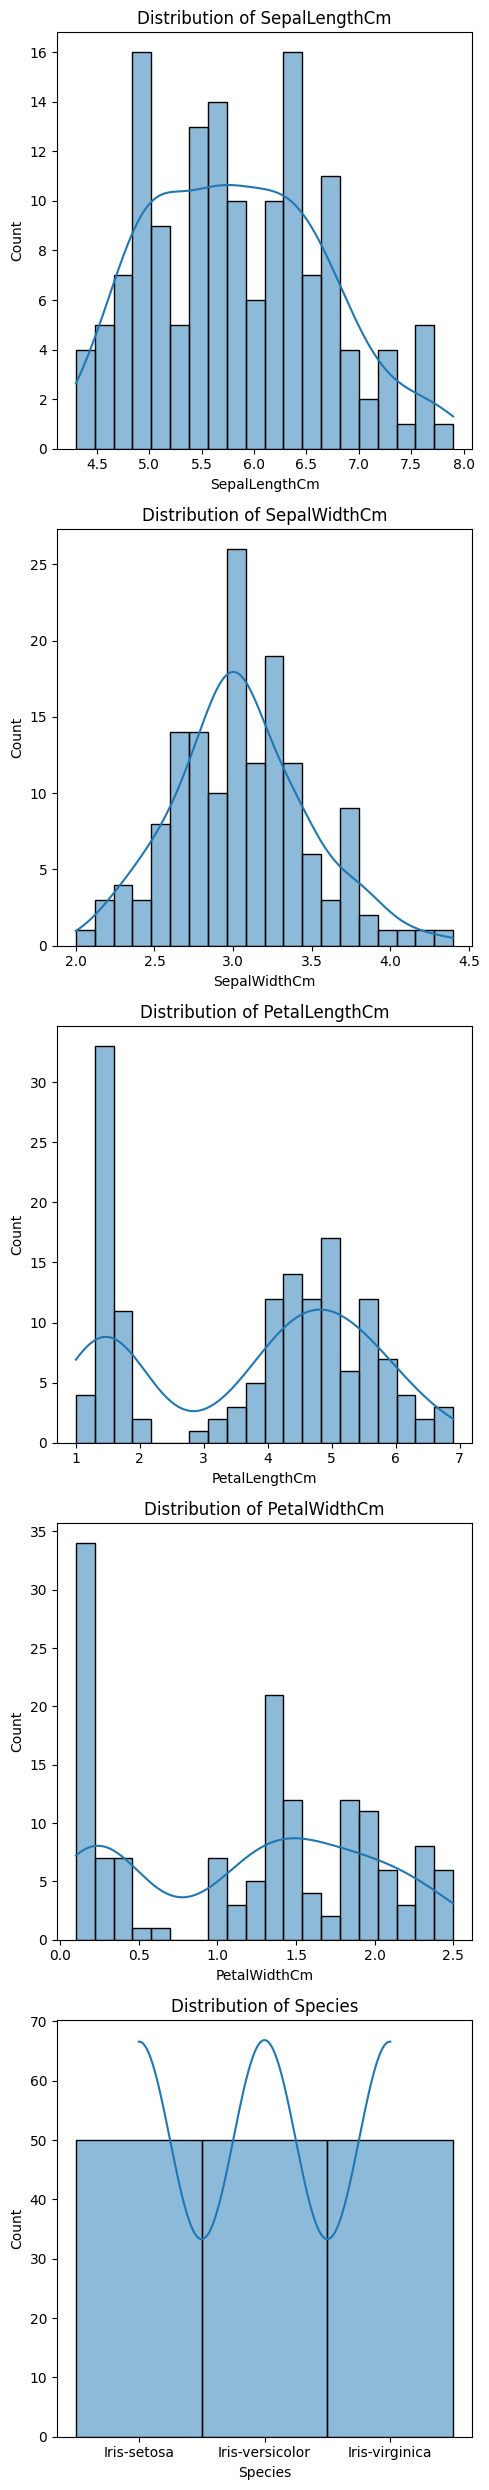

In [17]:
# Import required libraries
# Matplotlib for plotting and Seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of columns in the dataframe
# df.columns gives the column names; shape[0] returns the total count of columns
n_cols = df.columns.shape[0]

# Create subplots with one row for each column
# `plt.subplots` creates a grid of subplots. Here, we have `n_cols` rows and 1 column.
# `figsize` determines the size of the overall figure (width x height in inches).
fig, axes = plt.subplots(n_cols, 1, figsize=(5, 5 * n_cols))

# Loop through each column to plot its distribution
# `range(n_cols)` ensures we iterate over all column indices
for i in range(n_cols):
    # Get the column name by index
    column = df.columns[i]
    
    # Plot the histogram for the current column
    # `sns.histplot` creates a histogram of the data in the column.
    # `bins=20` specifies 20 bins for the histogram.
    # `kde=True` overlays a Kernel Density Estimate (KDE) curve on the histogram.
    # `ax=axes[i]` specifies the subplot where this histogram should be drawn.
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    
    # Set the title for the subplot
    # `f'Distribution of {column}'` dynamically inserts the column name into the title.
    axes[i].set_title(f'Distribution of {column}')

# Adjust the spacing between subplots to prevent overlap
# `plt.tight_layout` ensures the plots don't overlap with titles or labels.
plt.tight_layout()

# Display the final plot
plt.show()


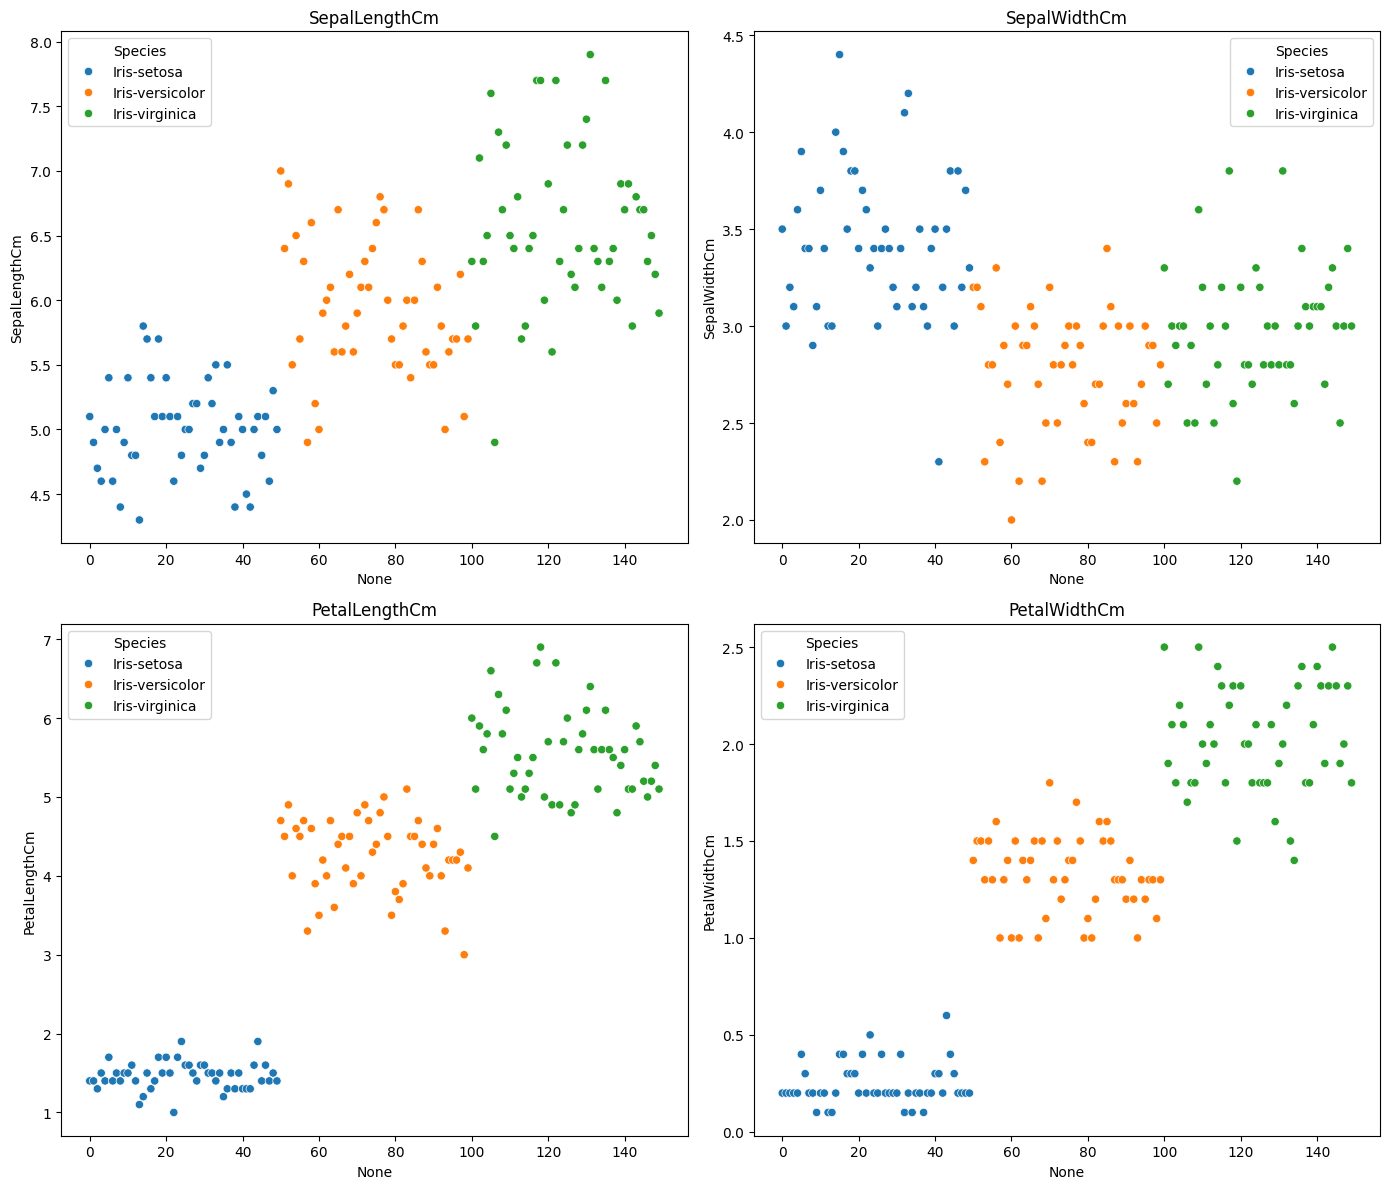

In [18]:
# Calculate the number of numerical columns to plot
# `len(df.columns)` gives the total number of columns, and `-1` excludes the 'Species' column.
num_cols = len(df.columns) - 1  # Exclude the target column (Species)

# Create a figure with 2 rows and 2 columns of subplots
# `plt.subplots(2, 2)` creates a grid of 4 subplots (2 rows, 2 columns).
# `figsize=(14, 12)` sets the overall size of the figure (14 inches wide, 12 inches tall).
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Flatten the 2D array of subplot axes into a 1D array
# This makes it easier to loop through the axes.
axes = axes.flatten()

# Loop through each numerical column and its corresponding subplot
# `enumerate` gives both the index (`i`) and the column name (`col`) for each iteration.
# `df.columns[:-1]` excludes the last column ('Species') for the loop.
for i, col in enumerate(df.columns[:-1]):
    # Create a scatter plot for the current column
    # `data=df` specifies the dataset.
    # `x=df.index` plots the index of the dataframe on the x-axis.
    # `y=col` plots the current column's values on the y-axis.
    # `hue='Species'` colors the points based on the 'Species' column.
    sns.scatterplot(ax=axes[i], data=df, x=df.index, y=col, hue='Species')
    
    # Set the title for the current subplot
    axes[i].set_title(col)

# Adjust the layout of the figure to prevent overlapping of subplots
# `plt.tight_layout` automatically adjusts subplot spacing.
plt.tight_layout()

# Display the figure with all the subplots
plt.show()


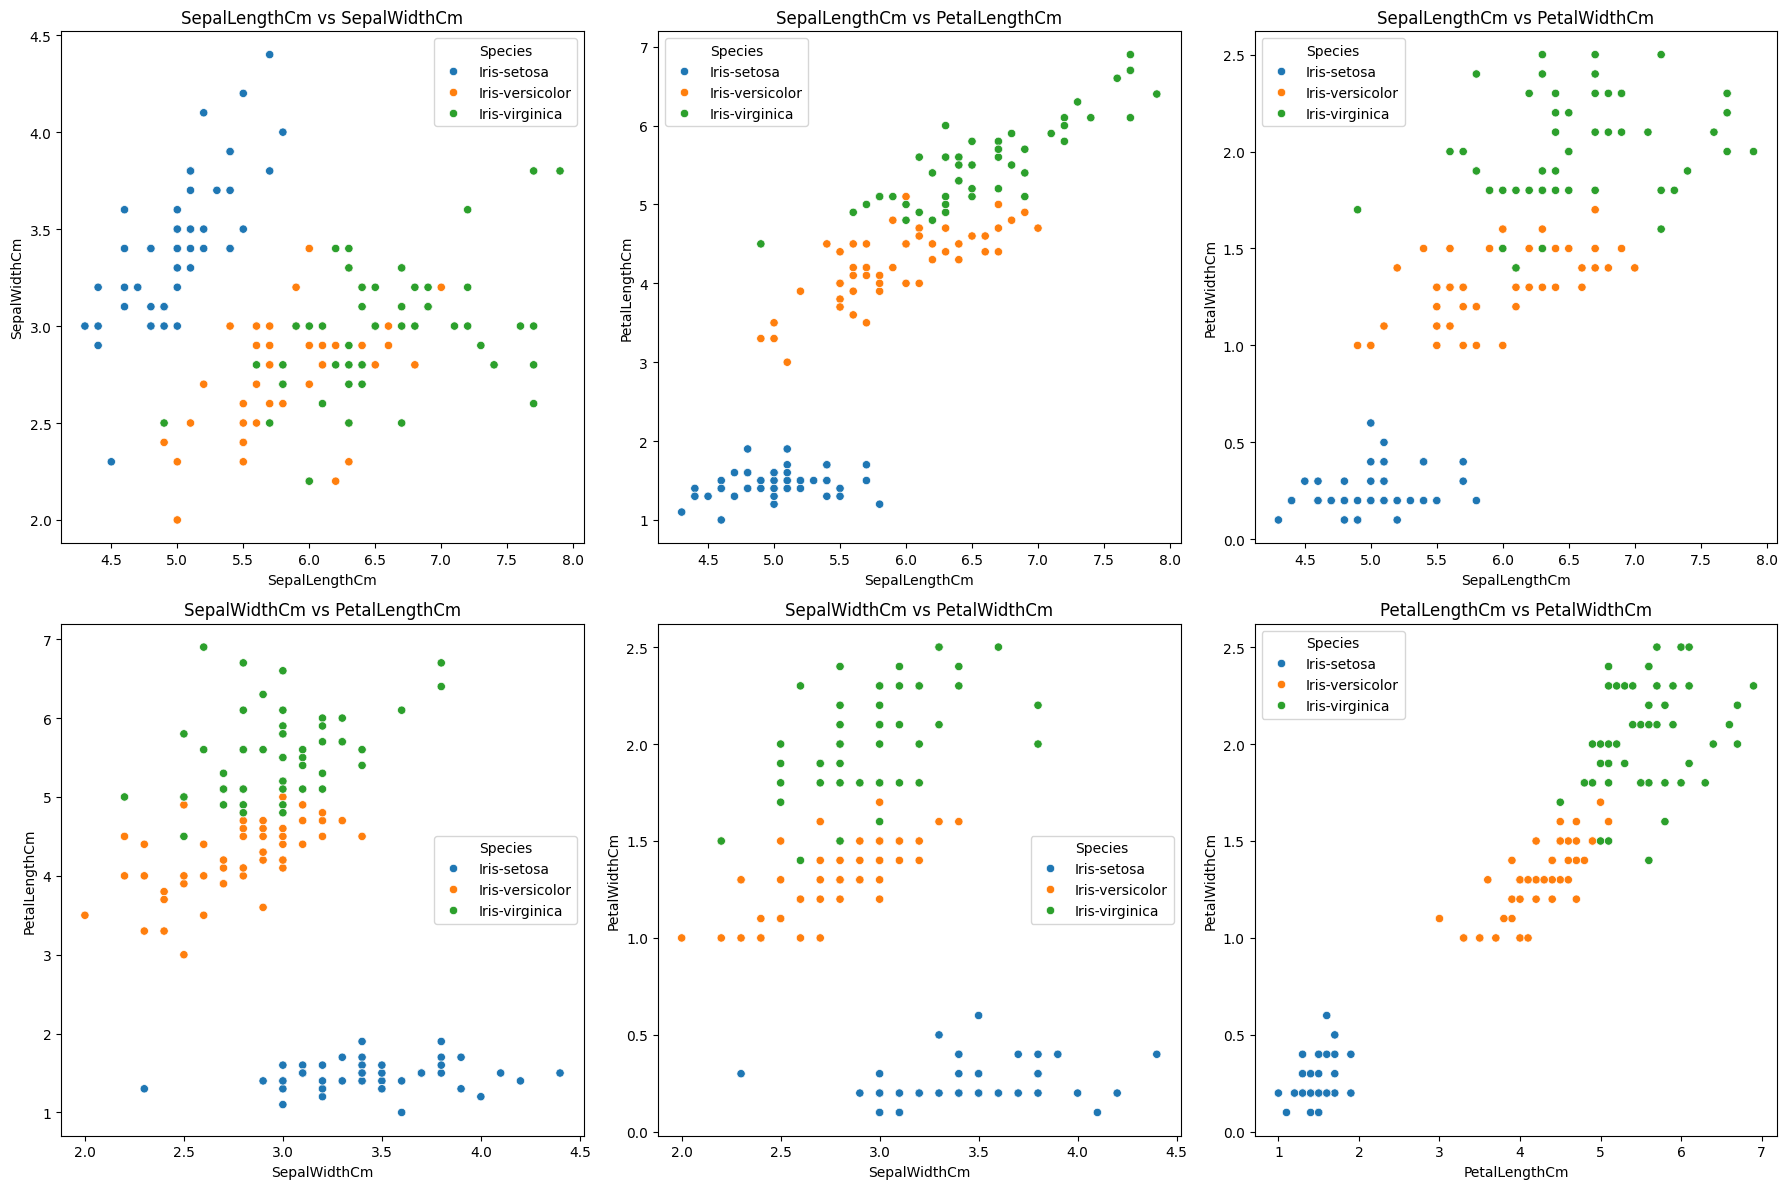

In [20]:
# Get the list of feature columns, excluding the target column ('Species')
# `df.columns[:-1]` selects all columns except the last one ('Species').
columns = df.columns[:-1]

# Count the number of feature columns
num_cols = len(columns)

# Create a grid of subplots
# `plt.subplots(2, 3)` creates a grid with 2 rows and 3 columns (total 6 subplots).
# `figsize=(18, 12)` sets the overall size of the figure (18 inches wide and 12 inches tall).
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Initialize a variable to track the current subplot index
plot_num = 0

# Loop through all pairs of feature columns without repetition
# `range(num_cols)` loops through all feature columns.
# For each feature column `i`, `range(i+1, num_cols)` loops through the remaining feature columns.
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        # Create a scatter plot for the current pair of features
        # `ax=axes[plot_num // 3, plot_num % 3]` selects the current subplot using row and column indices.
        # `data=df`: Uses the dataframe `df` as the data source.
        # `x=columns[i]` and `y=columns[j]`: Plot the ith and jth feature columns on the x and y axes, respectively.
        # `hue='Species'`: Colors the points based on the 'Species' column.
        sns.scatterplot(ax=axes[plot_num // 3, plot_num % 3], data=df, x=columns[i], y=columns[j], hue='Species')
        
        # Set the title for the current subplot
        # The title indicates which feature pair is being plotted.
        axes[plot_num // 3, plot_num % 3].set_title(f'{columns[i]} vs {columns[j]}')
        
        # Move to the next subplot
        plot_num += 1

# Adjust the layout to prevent overlapping of subplots, titles, or labels
# `plt.tight_layout` ensures proper spacing between subplots.
plt.tight_layout()

# Display the figure with all subplots
plt.show()


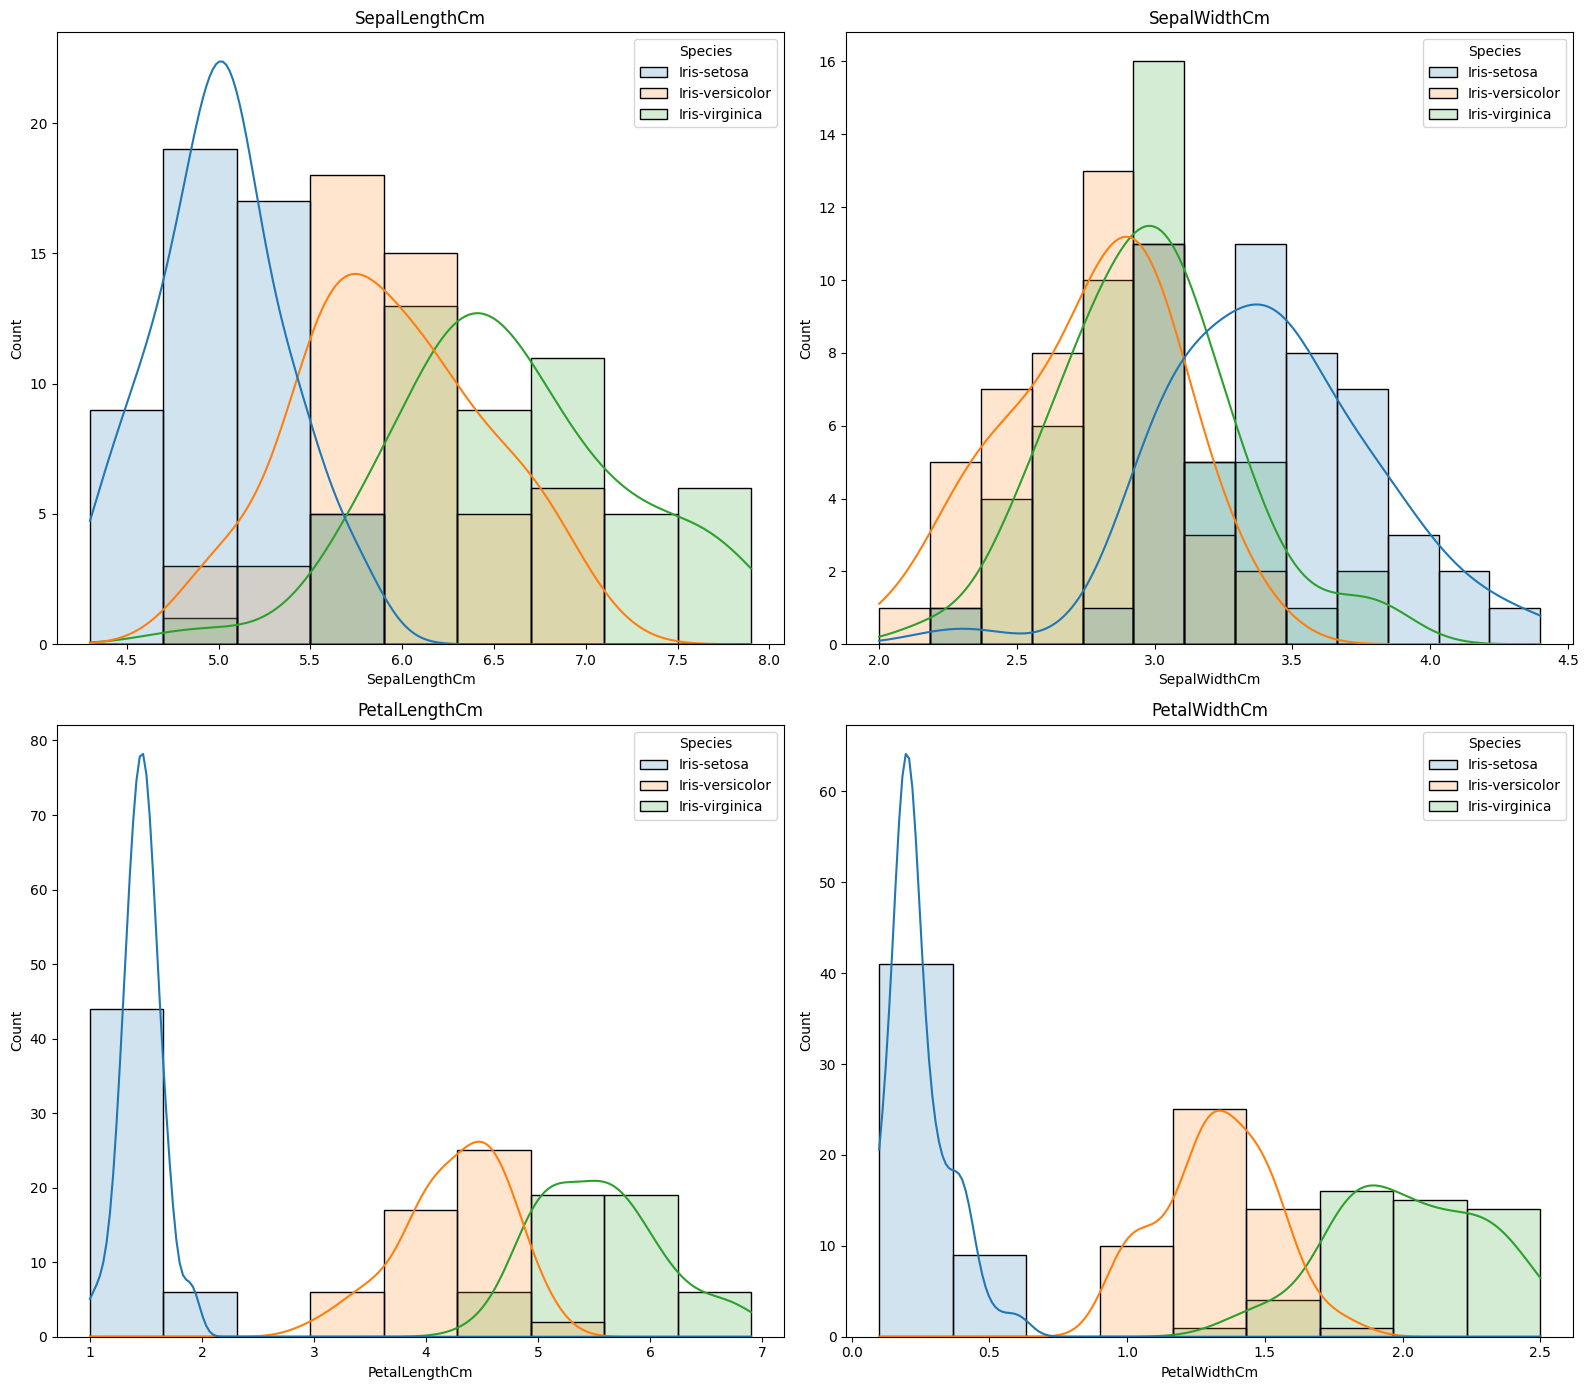

In [23]:
# List of columns to plot
# Select all columns except the last one ('Species'), which is the target variable.
columns = df.columns[:-1]

# Get the number of feature columns
num_cols = len(columns)

# Create a grid of subplots
# `plt.subplots(2, 2)` creates a 2x2 grid of subplots to accommodate up to 4 features.
# `figsize=(16, 14)` sets the overall figure size (16 inches wide and 14 inches tall).
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot each feature in its respective subplot
# Loop through each feature column and its index using `enumerate`.
for i, col in enumerate(columns):
    # Create a histogram with KDE (Kernel Density Estimate) overlay
    # `data=df`: Use the dataset `df`.
    # `x=col`: Set the x-axis to the current feature.
    # `hue='Species'`: Color the histogram based on the 'Species' column.
    # `kde=True`: Overlay a density curve for better visualization of the distribution.
    # `alpha=0.2`: Make the histogram bars semi-transparent for better readability.
    sns.histplot(ax=axes[i // 2, i % 2], data=df, x=col, hue='Species', kde=True, alpha=0.2)
    
    # Set the title of the subplot to the feature name
    axes[i // 2, i % 2].set_title(col)

# Adjust the layout to prevent overlapping
# `plt.tight_layout()` ensures proper spacing between subplots and avoids label or title overlaps.
plt.tight_layout()

# Display the plot
# This renders the figure with all subplots.
plt.show()



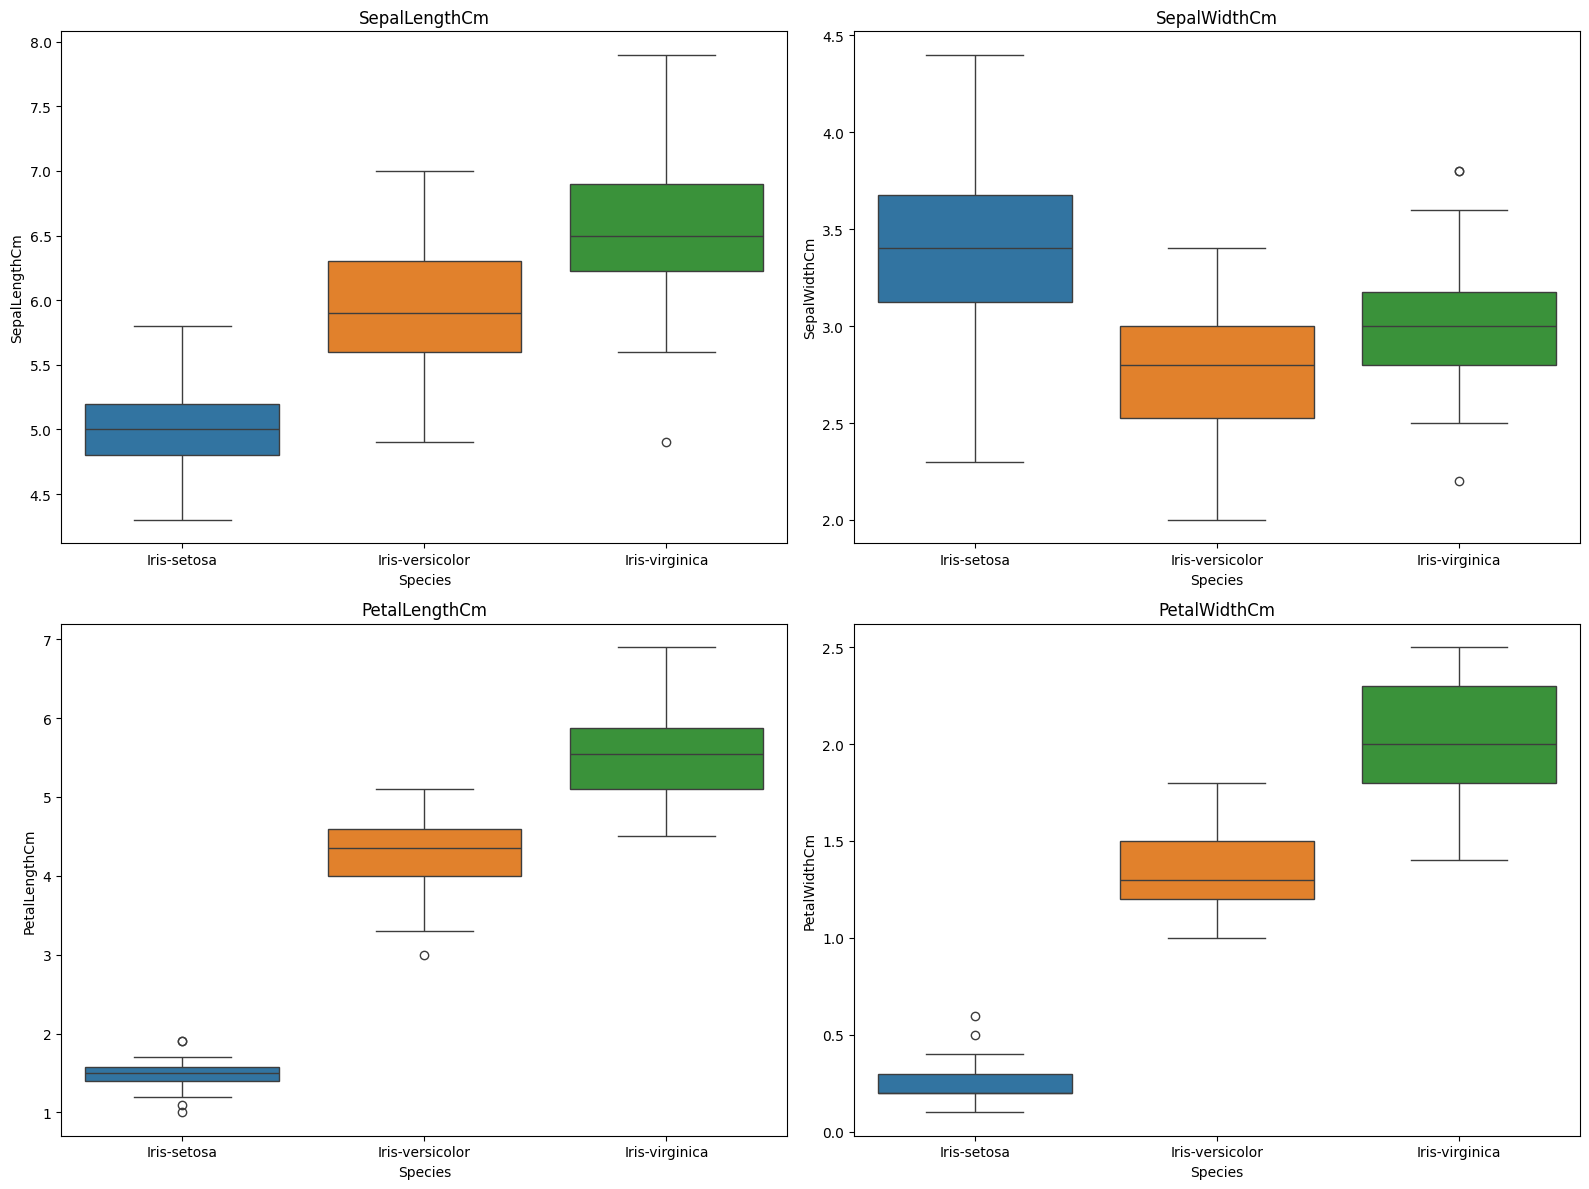

In [26]:
# List of columns to plot
# Select all columns except the last one ('Species'), which is the target variable.
columns = df.columns[:-1]

# create a grid of box plots
plt.figure(figsize=(16,12))
for i, col in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x='Species', y=col, hue='Species')
    plt.title(col)

plt.tight_layout()
plt.show()

## DATA PREPROCESSING

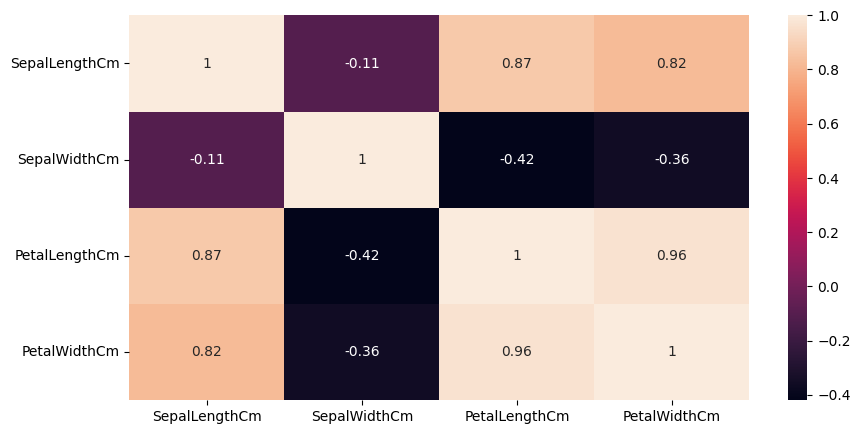

In [28]:
# Compute the correlation matrix
# `df.drop(columns='Species')`: Remove the 'Species' column since it is categorical and cannot be used in correlation computation.
# `.corr()`: Compute the correlation matrix for the remaining numerical columns.
corr = df.drop(columns='Species').corr()

# Plot the heatmap
# `plt.figure(figsize=(10, 5))`: Create a figure with a custom size of 10 inches wide and 5 inches tall.
plt.figure(figsize=(10, 5))

# `sns.heatmap()` creates the heatmap visualization.
# `corr`: The correlation matrix to visualize.
# `annot=True`: Display the correlation coefficients as text in each cell of the heatmap.
sns.heatmap(corr, annot=True)

# Display the heatmap
plt.show()


## Splitting Data 

In [72]:
# Step 1: Prepare features and target
X = df[["SepalLengthCm", "PetalLengthCm"]].copy()  # Select two features
y = df["Species"]

# Ensure X and y are numeric
if not np.issubdtype(X.dtypes[0], np.number):
    print("Converting X to numeric.")
    X = pd.get_dummies(X, drop_first=True)

if not np.issubdtype(y.dtypes, np.number):
    print("Encoding target variable.")
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

Encoding target variable.


C:\Users\Admin\AppData\Local\Temp\ipykernel_11956\3587667341.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.issubdtype(X.dtypes[0], np.number):


In [73]:
X

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [74]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Step 3: Train logistic regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Step 4: Predictions and evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


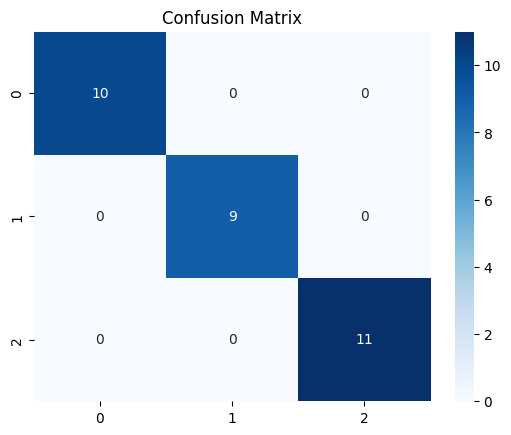

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [76]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report: ')
print(classification_report(y_test,y_pred))

## Visualization

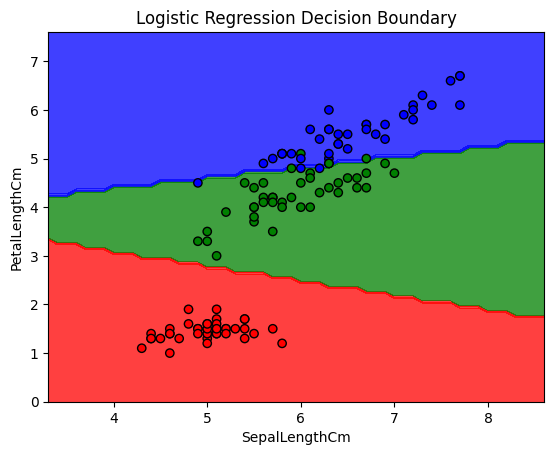

In [78]:
# Step 5: Visualize decision boundaries
X1, X2 = np.meshgrid(
    np.arange(start=X_train.iloc[:, 0].min() - 1, stop=X_train.iloc[:, 0].max() + 1, step=0.1),
    np.arange(start=X_train.iloc[:, 1].min() - 1, stop=X_train.iloc[:, 1].max() + 1, step=0.1)
)

grid_points = pd.DataFrame(np.array([X1.ravel(), X2.ravel()]).T, columns=X_train.columns)

Z = log_reg.predict(grid_points).reshape(X1.shape)

# Visualize decision boundaries
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

# Plot training points (no need for map since y_train is numeric)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], 
            c=y_train, edgecolor='black', cmap=ListedColormap(('red', 'green', 'blue')))

plt.title('Logistic Regression Decision Boundary')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.show()
